## Markov Chain
* What is Markov Chain?

A Markov Chain is a way to model a system that:

* Moves between different states 
* Where the next state depends only on the current state, not how you got there
→ (This is called the Markov property)

💬 “The future is independent of the past, given the present.”

### 🍦 Real-life Example: Weather Forecast

Imagine you're modeling the weather.

Let’s say each day can be:

☀️ Sunny

🌧️ Rainy

And based on historical data:

* If it's sunny today, there's a 90% chance it will be sunny tomorrow, and 10% chance of rain.
* If it's rainy today, there's a 50% chance it will be sunny tomorrow, and 50% chance of more rain.

#### This is a 2-state Markov Chain.

---------------------------------------------------------------------
### Markov Chain Simulation in python

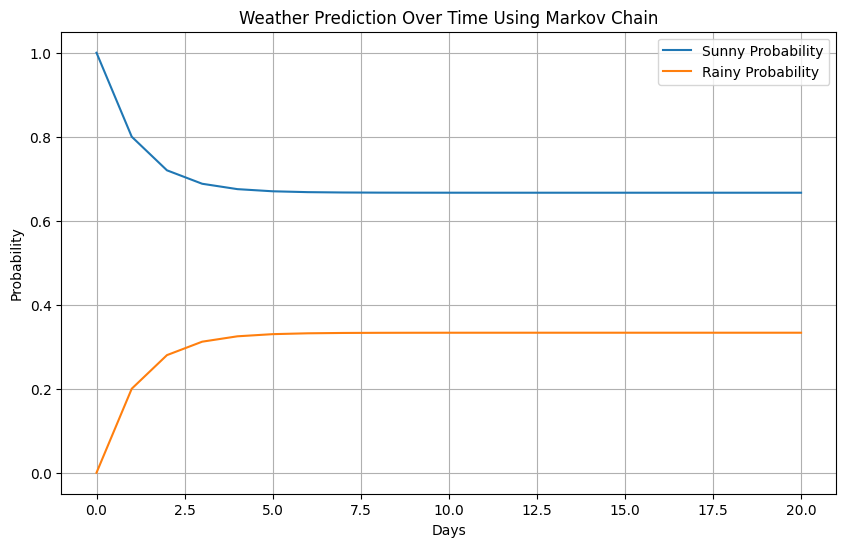

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Transition matrix (can be calculated based on historical data)
P = np.array([
    [0.8, 0.2],  # From Sunny
    [0.4, 0.6]   # From Rainy
])

# Initial state vector: 100% Sunny on Day 0
v = np.array([1.0, 0.0]) # [Sunny, Rainy]

# Track state probabilities over time
days = 20
history = [v]

for i in range(days):
    v = np.dot(v, P)
    history.append(v)

# Convert to NumPy array for easy plotting
history = np.array(history)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(history[:, 0], label='Sunny Probability')
plt.plot(history[:, 1], label='Rainy Probability')
plt.title("Weather Prediction Over Time Using Markov Chain")
plt.xlabel("Days")
plt.ylabel("Probability")
plt.grid(True)
plt.legend()
plt.show()

In [7]:
history[:, 1]

array([0.        , 0.2       , 0.28      , 0.312     , 0.3248    ,
       0.32992   , 0.331968  , 0.3327872 , 0.33311488, 0.33324595,
       0.33329838, 0.33331935, 0.33332774, 0.3333311 , 0.33333244,
       0.33333298, 0.33333319, 0.33333328, 0.33333331, 0.33333332,
       0.33333333])

## Using randomness to generate sampled weather outcomes

* Python simulation that generates actual sampled weather outcomes using randomness, based on the Markov chain transition matrix for Sunny and Rainy days.

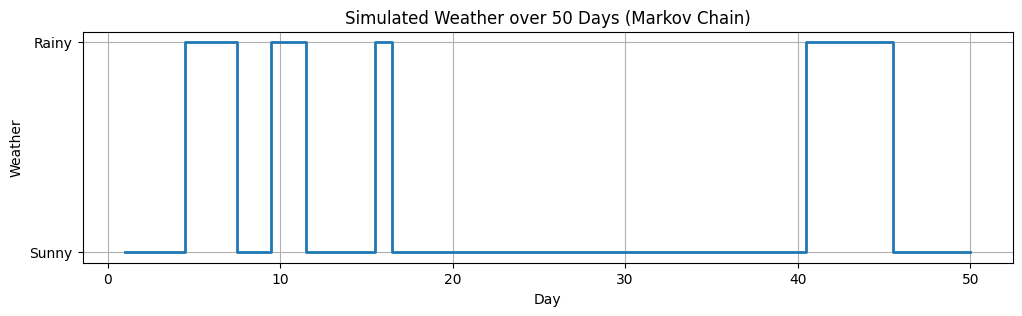

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Transition matrix
P = {
    "Sunny": {"Sunny": 0.8, "Rainy": 0.2},
    "Rainy": {"Sunny": 0.4, "Rainy": 0.6}
}

states = ["Sunny", "Rainy"]
num_days = 50
initial_state = "Sunny"

# Simulate actual weather states
weather = [initial_state]

for _ in range(num_days - 1):
    current_state = weather[-1]
    next_state = np.random.choice(
        states,
        p=[P[current_state]["Sunny"], P[current_state]["Rainy"]]
    )
    weather.append(next_state)

# Plot results
days = list(range(1, num_days + 1))
weather_numeric = [0 if w == "Sunny" else 1 for w in weather]

plt.figure(figsize=(12, 3))
plt.step(days, weather_numeric, where="mid", linewidth=2)
plt.yticks([0, 1], ["Sunny", "Rainy"])
plt.xlabel("Day")
plt.ylabel("Weather")
plt.title("Simulated Weather over 50 Days (Markov Chain)")
plt.grid(True)
plt.show()

## Modeling Customer Behavior using Markov Chain (Modeling User Journeys)

* Modeling customer behavior using a Markov Chain is a powerful way to capture how users move between various states in their journey — like 
   * Browsing → Cart → Purchase → Churn. 
   
Below is a full breakdown of:

✅ 1. Defining Your States

We have 4 distinct customer states:

* Browsing
* Adding to Cart
* Purchasing
* Churning

Each user exists in one of these at any time.

✅ 2. Constructing a Transition Matrix
You create a transition matrix to describe the probability of moving from one state to another:

|From \ To |	Browsing |	Cart |	Purchase |	Churn|
|:--------|:---------|:---------|:---------|:---------|
Browsing |	0.4|            0.3|        0.1|       0.2|
|Cart|      0.1|            0.4|        0.4|       0.1|
|Purchase|	0.0|	        0.0|	    0.9|	   0.1|
|Churn|	    0.0|	        0.0|	    0.0|	   1.0|

This means:

* A Browsing customer has a 30% chance of going to Cart next, 
* 10% chance to Purchase, and 
* 20% chance of Churning.

Churn is an absorbing state — once there, they stay there.

In [46]:
import numpy as np

states = ["Browsing", "Cart", "Purchase", "Churn"]

# Transition matrix based on 
transition_matrix = np.array([
    [0.4, 0.3, 0.1, 0.2],
    [0.1, 0.4, 0.4, 0.1],
    [0.0, 0.0, 0.9, 0.1],
    [0.0, 0.0, 0.0, 1.0]
])

state_index = {state: i for i, state in enumerate(states)}
state_index

{'Browsing': 0, 'Cart': 1, 'Purchase': 2, 'Churn': 3}

In [47]:
transition_matrix[0]

array([0.4, 0.3, 0.1, 0.2])

In [50]:
import numpy as np

states = ["Browsing", "Cart", "Purchase", "Churn"]

# Transition matrix based on 
transition_matrix = np.array([
    [0.4, 0.3, 0.1, 0.2],
    [0.1, 0.4, 0.4, 0.1],
    [0.0, 0.0, 0.9, 0.1],
    [0.0, 0.0, 0.0, 1.0]
])

state_index = {state: i for i, state in enumerate(states)}

def simulate_customer(start_state="Browsing", steps=10):
    current = state_index[start_state]
    history = [states[current]]
    
    for _ in range(steps):
        current = np.random.choice(range(4), p=transition_matrix[current])
        print(f"current state index: {current}")
        print(f"chosen transition vector: {transition_matrix[current]}")
        history.append(states[current])
        if states[current] == "Churn":
            break
            
    return history

print(simulate_customer())


current state index: 0
chosen transition vector: [0.4 0.3 0.1 0.2]
current state index: 1
chosen transition vector: [0.1 0.4 0.4 0.1]
current state index: 1
chosen transition vector: [0.1 0.4 0.4 0.1]
current state index: 2
chosen transition vector: [0.  0.  0.9 0.1]
current state index: 2
chosen transition vector: [0.  0.  0.9 0.1]
current state index: 2
chosen transition vector: [0.  0.  0.9 0.1]
current state index: 2
chosen transition vector: [0.  0.  0.9 0.1]
current state index: 2
chosen transition vector: [0.  0.  0.9 0.1]
current state index: 2
chosen transition vector: [0.  0.  0.9 0.1]
current state index: 2
chosen transition vector: [0.  0.  0.9 0.1]
['Browsing', 'Browsing', 'Cart', 'Cart', 'Purchase', 'Purchase', 'Purchase', 'Purchase', 'Purchase', 'Purchase', 'Purchase']


In [ ]:
# This is how np.random.choice is making a selection of states based on the random number generated
import numpy as np

probs = [0.4, 0.3, 0.1, 0.2]
states = ['Browsing', 'Cart', 'Purchase', 'Churn']

r = np.random.rand()  # e.g., 0.65
cumulative = np.cumsum(probs)  # [0.4, 0.7, 0.8, 1.0]
cumulative

for i, cp in enumerate(cumulative):
    if r<cp:
        print(f"Random number: {r:.2f}, selected state: {states[i]}")
        break

Random number: 0.79, selected state: Purchase
